In [1]:
import joblib
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [2]:
WT_10x_data = sc.read_10x_mtx('/Users/Yi/Desktop/Aire C311Y/Aire_WT_filtered_feature_bc_matrix')

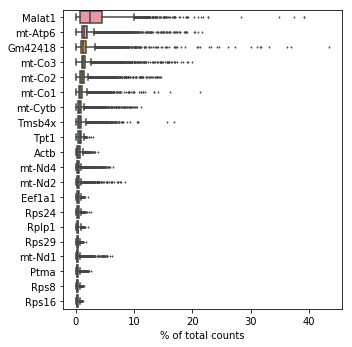

In [3]:
sc.pl.highest_expr_genes(WT_10x_data, n_top=20)

In [4]:
sc.pp.filter_cells(WT_10x_data, min_genes=200)
sc.pp.filter_genes(WT_10x_data, min_cells=1)

Trying to set attribute `.obs` of view, making a copy.


In [5]:
mito_genes = WT_10x_data.var_names.str.startswith('mt-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
WT_10x_data.obs['percent_mito'] = np.sum(
    WT_10x_data[:, mito_genes].X, axis=1).A1 / np.sum(WT_10x_data.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
WT_10x_data.obs['n_counts'] = WT_10x_data.X.sum(axis=1).A1

... storing 'feature_types' as categorical


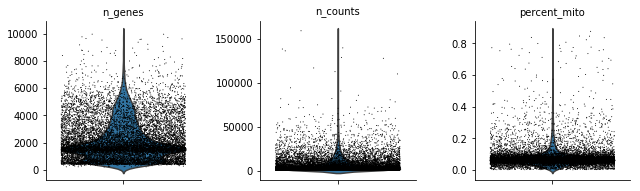

In [6]:
sc.pl.violin(WT_10x_data, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

In [7]:
True in mito_genes

True

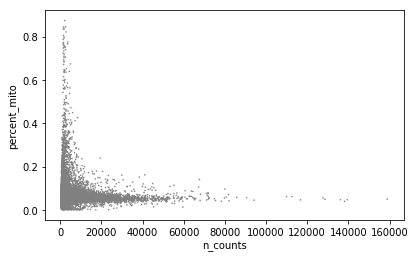

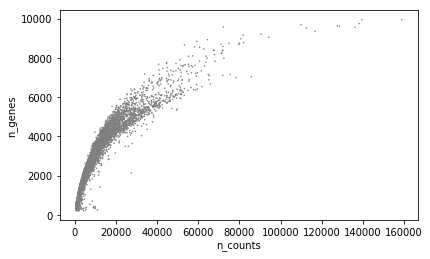

In [8]:
sc.pl.scatter(WT_10x_data, x='n_counts', y='percent_mito')
sc.pl.scatter(WT_10x_data, x='n_counts', y='n_genes')

In [9]:
WT_10x_data = WT_10x_data[WT_10x_data.obs['n_genes'] < 6000, :]
WT_10x_data = WT_10x_data[WT_10x_data.obs['percent_mito'] < 0.1, :]

In [10]:
sc.pp.normalize_per_cell(WT_10x_data, counts_per_cell_after=1e4)

Trying to set attribute `.obs` of view, making a copy.


In [11]:
sc.pp.log1p(WT_10x_data)

In [12]:
WT_10x_data.raw=WT_10x_data

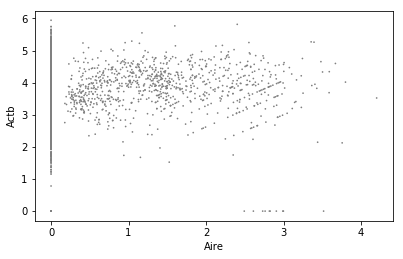

In [13]:
sc.pl.scatter(WT_10x_data,x = "Aire", y = "Actb", use_raw = True)

In [14]:
sc.pp.highly_variable_genes(WT_10x_data, min_mean=0.0125, max_mean=3, min_disp=0.5)

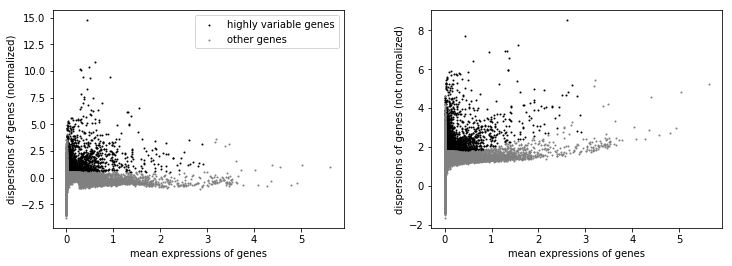

In [15]:
sc.pl.highly_variable_genes(WT_10x_data)

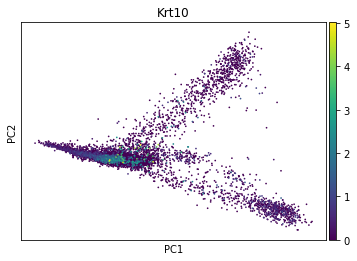

In [16]:
WT = WT_10x_data[:, WT_10x_data.var['highly_variable']]
sc.pp.regress_out(WT, ['n_counts', 'percent_mito'])
sc.pp.scale(WT, max_value=10)
sc.tl.pca(WT, svd_solver='arpack')
sc.pl.pca(WT, color=['Krt10'])

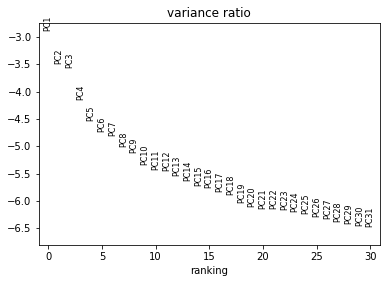

In [17]:
sc.pl.pca_variance_ratio(WT, log=True)

In [18]:
sc.pp.neighbors(WT, n_neighbors=10, n_pcs=40)

/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../opt/anaconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/opt/anaconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../opt/anaconda3/lib/python3.7/site-packages/umap/utils.py", line 409:
@n

In [19]:
sc.tl.umap(WT)

In [20]:
sc.tl.leiden(WT,resolution = 0.5)

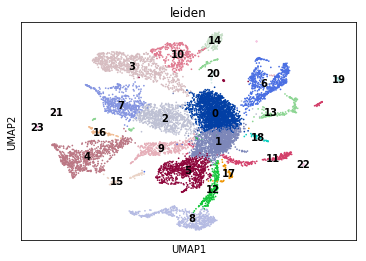

In [21]:
sc.pl.umap(WT, color=['leiden'], legend_loc = 'on data')

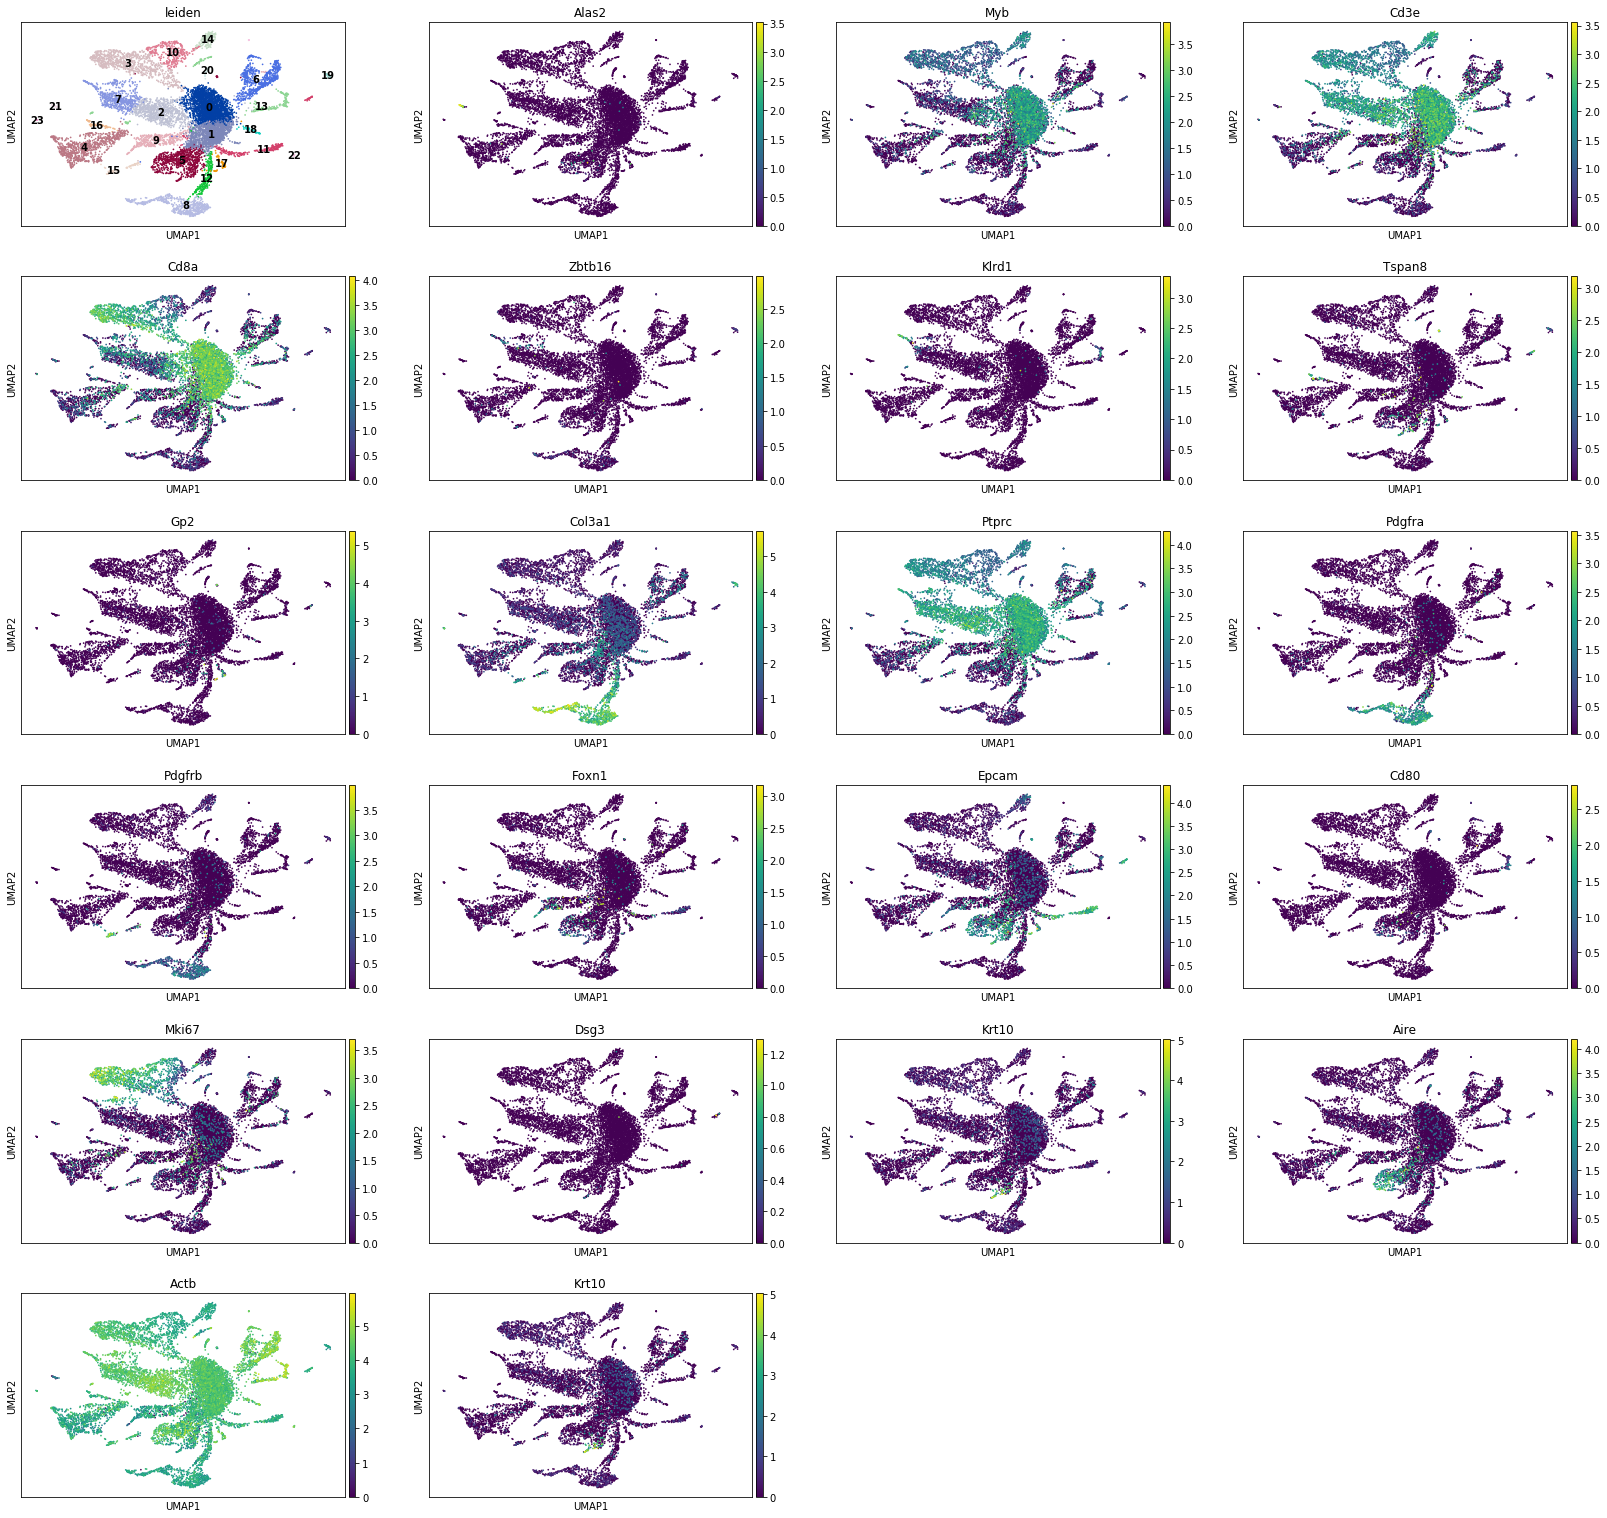

In [23]:
sc.pl.umap(WT, color=['leiden','Alas2','Myb','Cd3e','Cd8a','Zbtb16','Klrd1','Tspan8','Gp2','Col3a1','Ptprc','Pdgfra','Pdgfrb','Foxn1','Epcam','Cd80','Mki67','Dsg3','Krt10','Aire','Actb','Krt10'], legend_loc = 'on data', use_raw = True)

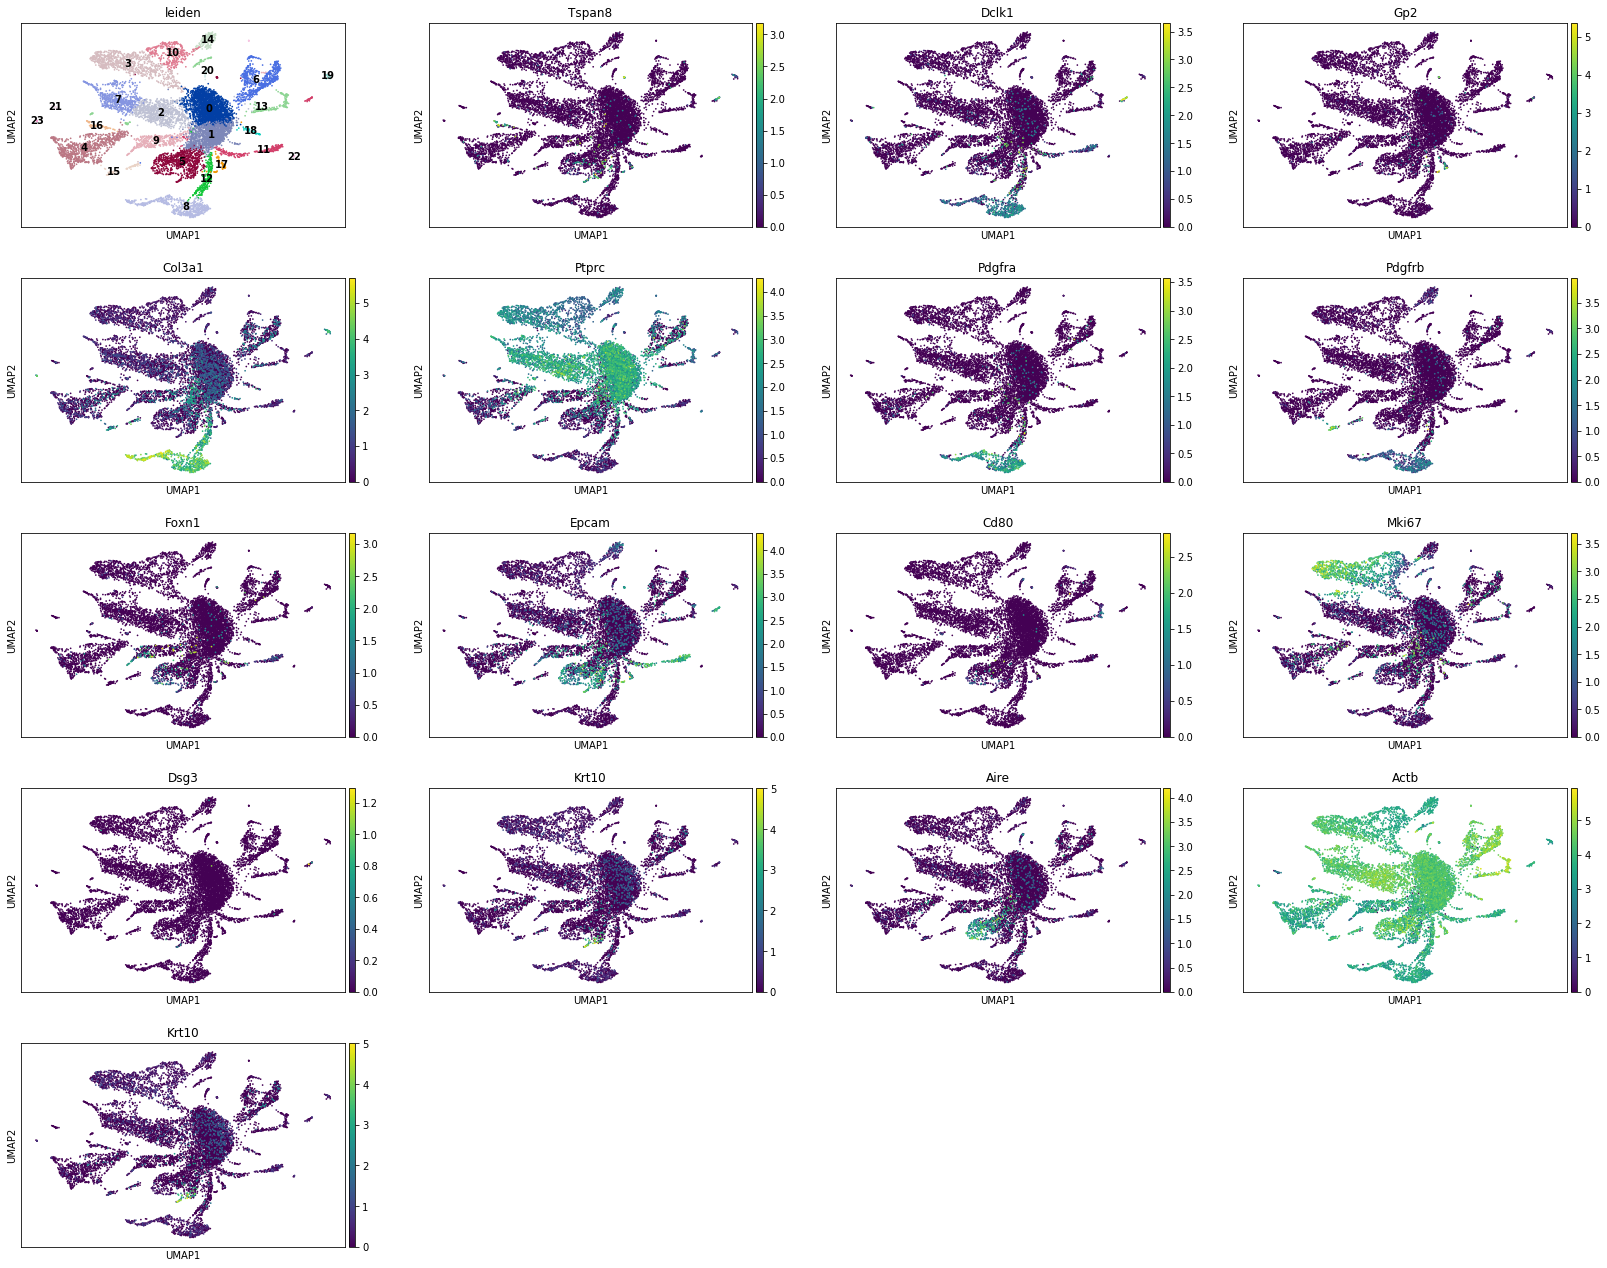

In [25]:
sc.pl.umap(WT, color=['leiden','Tspan8','Dclk1','Gp2','Col3a1','Ptprc','Pdgfra','Pdgfrb','Foxn1','Epcam','Cd80','Mki67','Dsg3','Krt10','Aire','Actb','Krt10'], legend_loc = 'on data', use_raw = True)

In [30]:
TECs = WT[(WT.obs.leiden == '5') | (WT.obs.leiden == '9') | (WT.obs.leiden == '11') | (WT.obs.leiden == '17')]

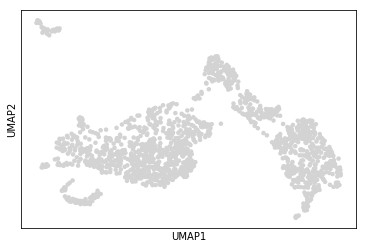

In [31]:
sc.tl.umap(TECs)
sc.pl.umap(TECs)

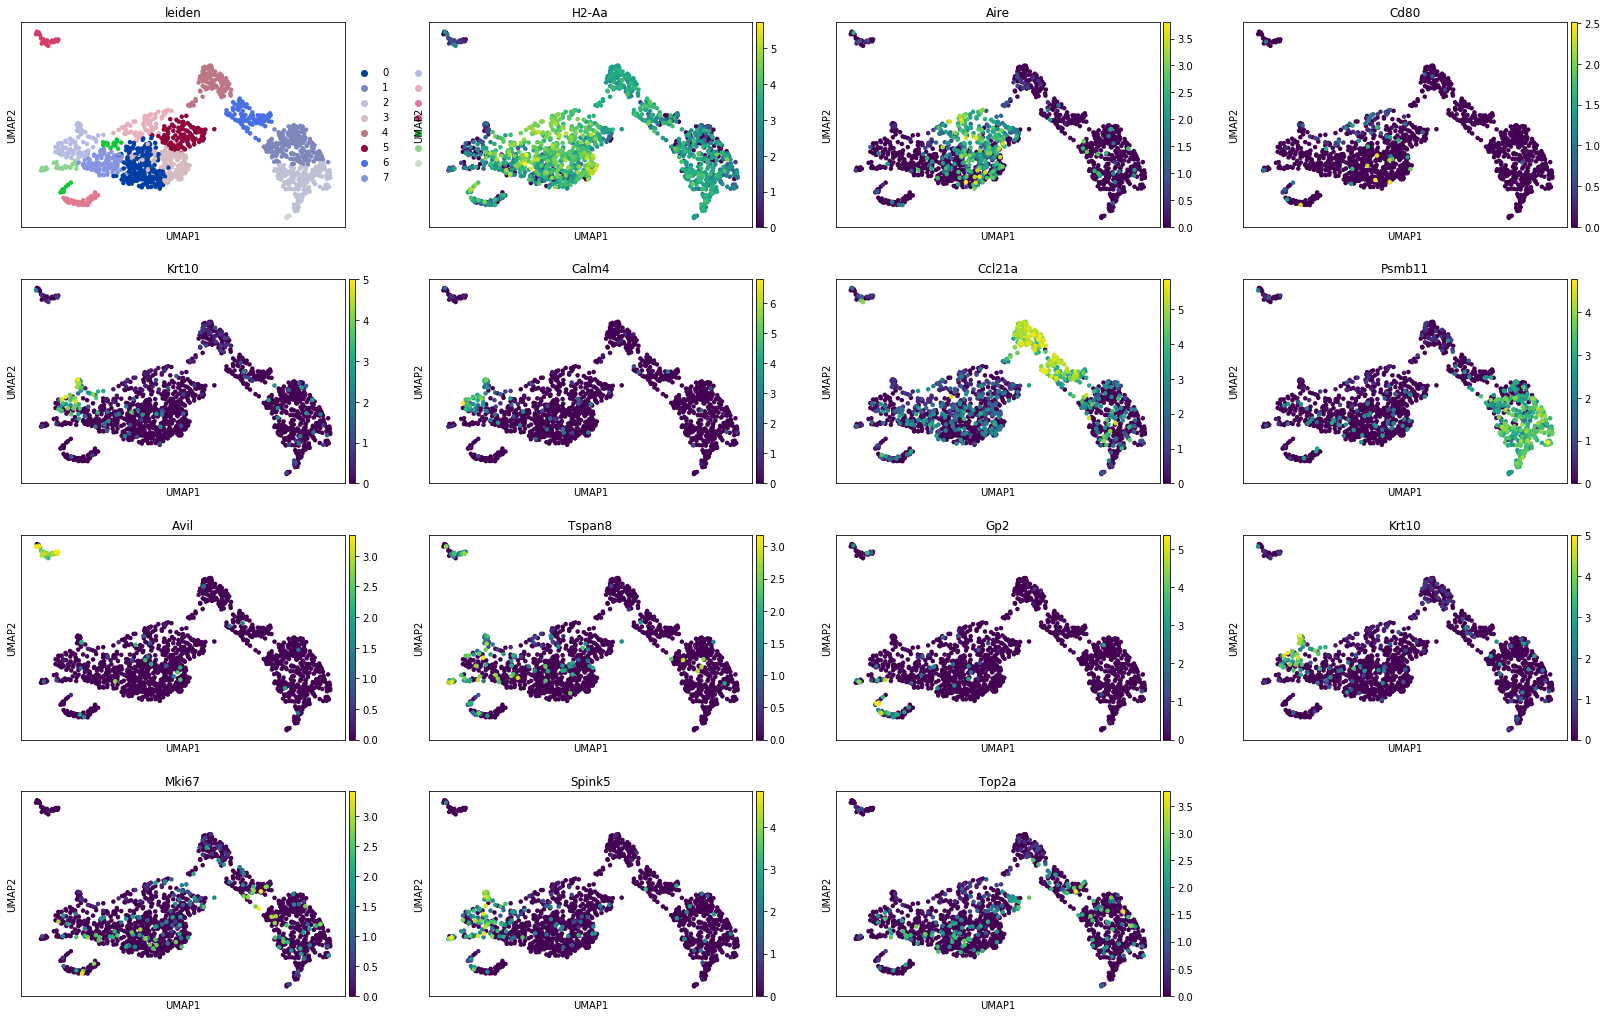

In [37]:
sc.tl.leiden(TECs,resolution = 0.7)
sc.pl.umap(TECs, color=['leiden','H2-Aa','Aire','Cd80','Krt10','Calm4','Ccl21a','Psmb11','Avil','Tspan8','Gp2','Krt10','Mki67','Spink5','Top2a'])

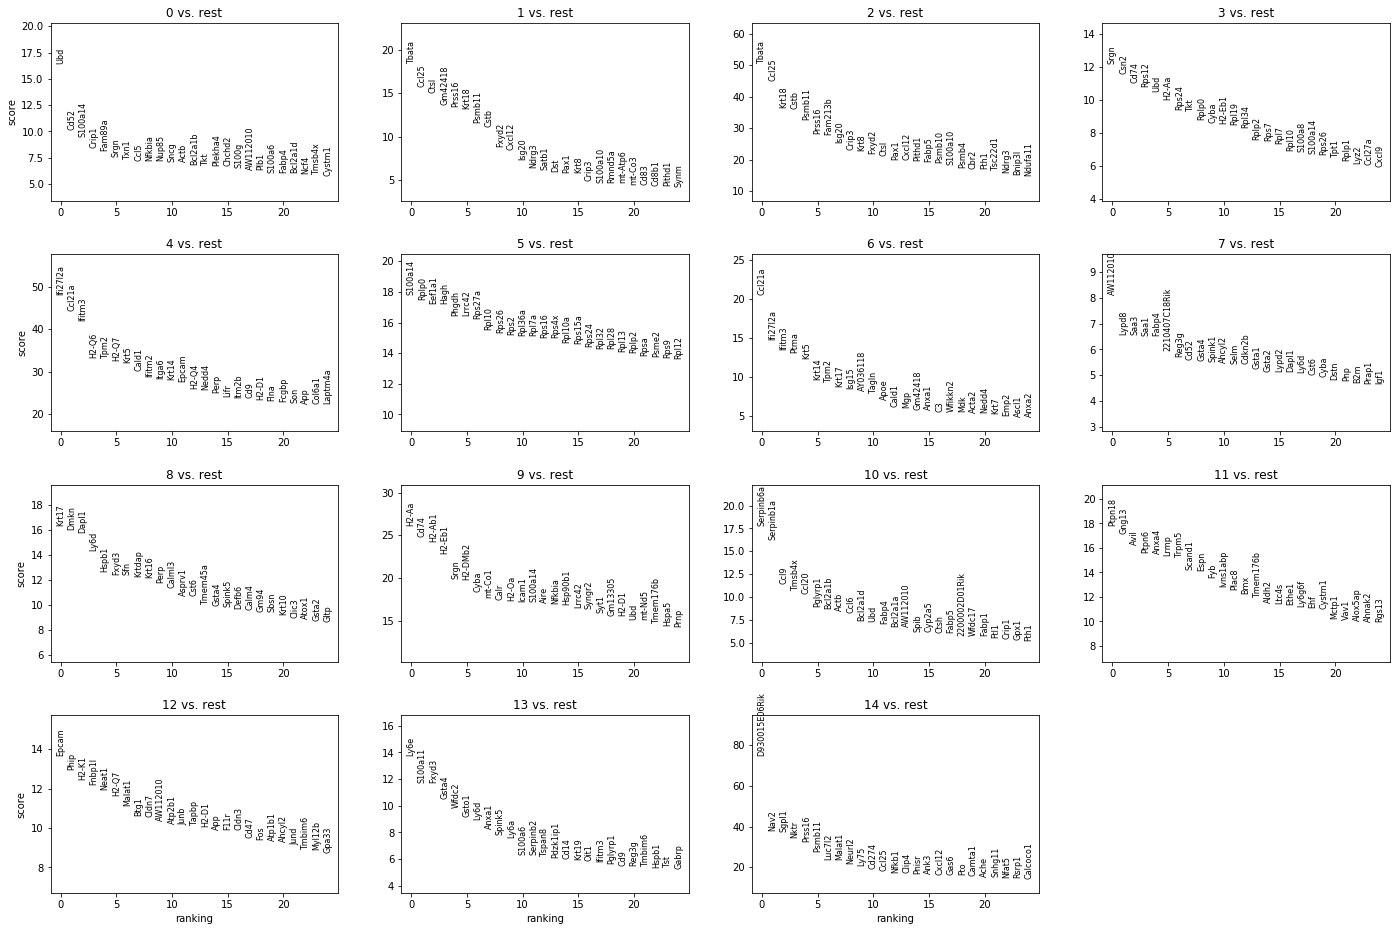

In [38]:
sc.tl.rank_genes_groups(TECs, 'leiden', method='t-test')
sc.pl.rank_genes_groups(TECs, n_genes=25, sharey=False)

In [39]:
TECs.write('/Users/Yi/Desktop/Aire C311Y/TECs_WT_wo_cell_cycle.h5ad')